# Demo for d_mg5_data.py

### Setup

In [1]:
import d_mg5_data
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

channels = ["VzToZhToVevebb", "VzToQCD"]
fatjet_events = [d_mg5_data.FatJetEvents(channel) for channel in channels]

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------
DataLog: Successfully create VzToZhToVevebb with 246300 events.
DataLog

### Particles/Anti-Particles distribution of events

Plot the constituent in pie chart for each channel.

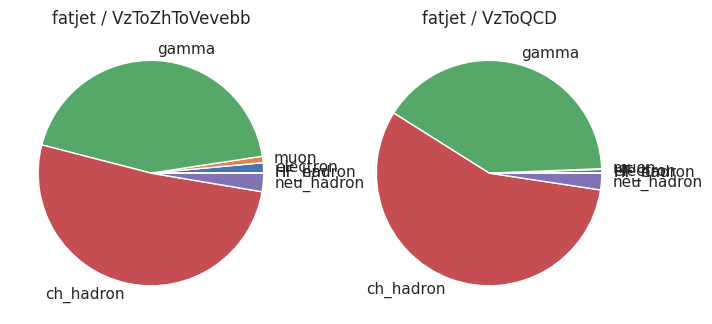

In [2]:
fig, ax     = plt.subplots(1, len(channels), figsize=(4*len(channels), 2*4), facecolor="white")
pdgid_table = d_mg5_data.pdgid_table
pdgid_keys  = pdgid_table.keys()

def draw_constituent(single_ax, events):
    x = [ak.sum(np.abs(events[f"fatjet_daughter_pid"]) == pdgid_table[key]) for key in pdgid_keys]
    single_ax.pie(x=x, labels=pdgid_keys)

for i in range(len(channels)):
    draw_constituent(ax[i], fatjet_events[i].events)
    ax[i].set_title(f"fatjet / {channels[i]}")

### Pt, eta, phi distribution of jets or fatjets

Plot `Pt`, `eta`, `phi` of individual fatjet

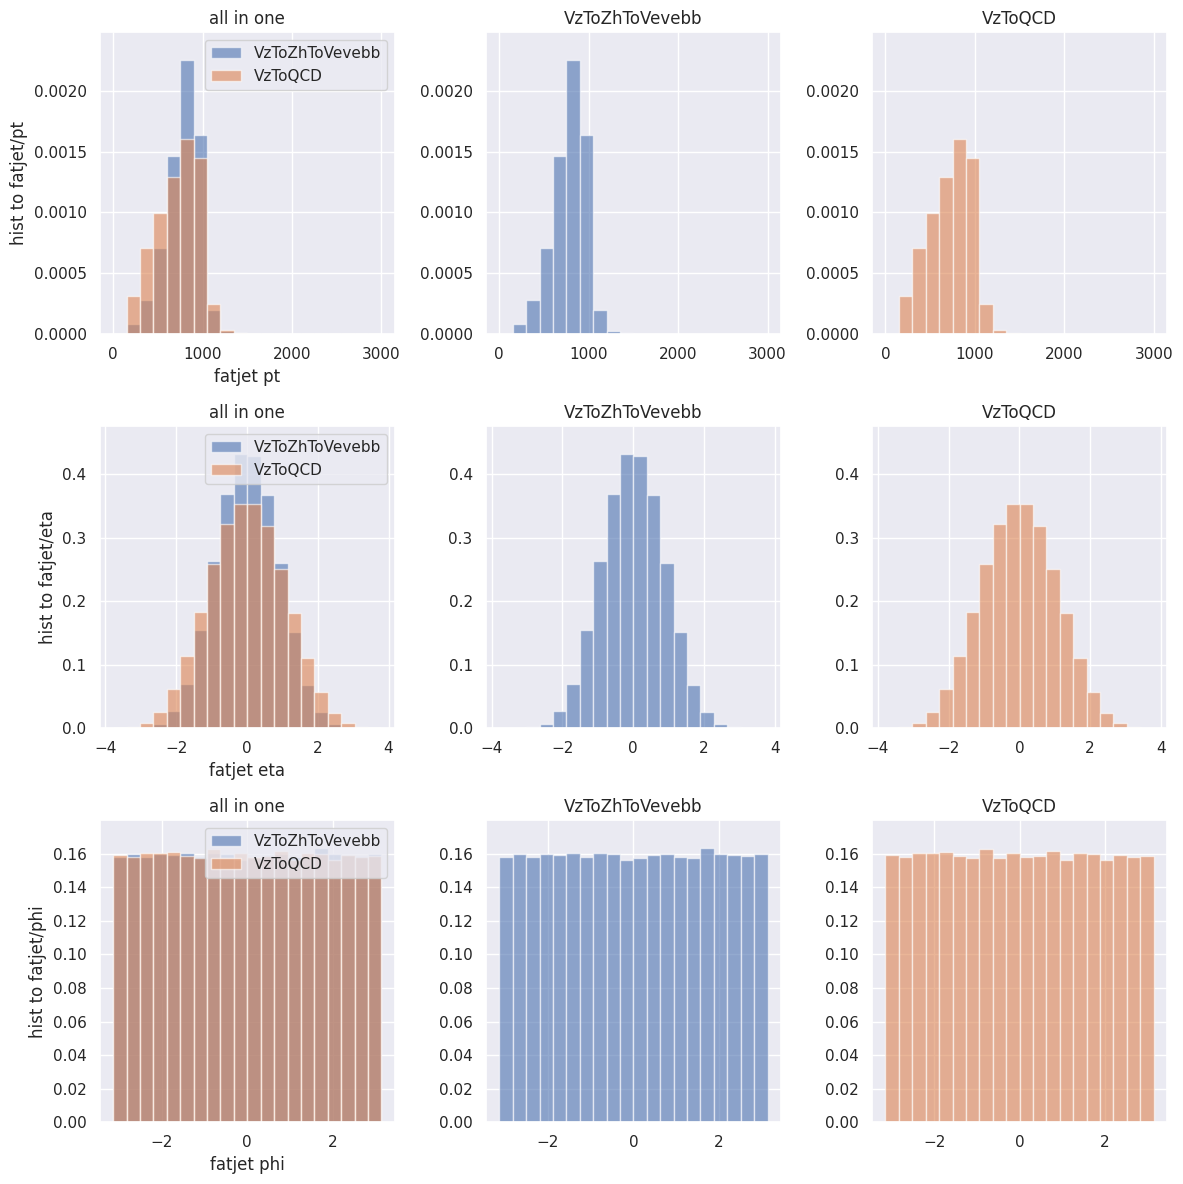

In [3]:
fig, ax = plt.subplots(3, len(channels)+1, figsize=((len(channels)+1)*4, 3*4))

def draw_jet_distribution(row_ax, feature, bins, xrange=None):
    target_events = [events.events for events in fatjet_events]
    if xrange == None:
        xrange = [
            min([ak.min(events[f"fatjet_{feature}"]) for events in target_events]),
            max([ak.max(events[f"fatjet_{feature}"]) for events in target_events]),
        ]
    yrange = [0,0]
    for i in range(len(channels)):
        events = target_events[i]
        data = ak.to_numpy(events[f"fatjet_{feature}"])
        row_ax[i+1].hist(data, bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        pdf, _, _ = row_ax[0].hist(data, bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True)
        yrange[1] = max(yrange[1], max(pdf))
    yrange[1] *= 1.1
    for i in range(len(channels)):
        row_ax[0].set_title(f"all in one")
        row_ax[0].set_xlabel(f"fatjet {feature}")
        row_ax[0].set_ylabel(f"hist to fatjet/{feature}")
        row_ax[0].set_ylim(yrange)
        row_ax[0].legend()
        row_ax[i+1].set_title(channels[i])
        row_ax[i+1].set_ylim(yrange)
        
draw_jet_distribution(ax[0], "pt", bins=20, xrange=[0, 3000])
draw_jet_distribution(ax[1], "eta", bins=20)
draw_jet_distribution(ax[2], "phi", bins=20)
plt.tight_layout()

### Number of particles in subjets

In [ ]:
Rs = [0.1, 0.2, 0.4]
fig, ax = plt.subplots(len(Rs),len(channels)+1,figsize=((len(channels)+1)*4, len(Rs)*4))

def draw_subjet_particle_number(row_ax, R, bins, xrange=None):
    for events in fatjet_events:
        events.generate_fastjet_events(subjet_radius=R)
    num_subjets = [ak.num(events.events["fast_pt"], axis=1) for events in fatjet_events]
    if xrange == None:
        xrange = [0, max([ak.max(num_subjets[i]) for i in range(len(num_subjets))])]
    yrange = [0,0]
    for i in range(len(channels)):
        row_ax[i+1].hist(num_subjets[i], bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        pdf, _, _ = row_ax[0].hist(num_subjets[i], bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True)
        yrange[1] = max(yrange[1], max(pdf))
    yrange[1] *= 1.1
    row_ax[0].set_title(R)
    for i in range(len(channels)):
        row_ax[i+1].set_title(channels[i])
        row_ax[i+1].set_ylim(yrange)

for i in range(len(Rs)):
    draw_subjet_particle_number(ax[i], R=Rs[i], bins=15)
plt.tight_layout()